In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# verideki deƒüi≈ükenlerin (features) polinomlarƒ±nƒ± olu≈üturarak, lineer modellerin doƒürusal olmayan (non-linear) ili≈ükileri de √∂ƒürenebilmesini saƒülar.

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# Pipeline, veri √ºzerinde sƒ±rayla uygulanacak i≈ülemleri (√∂rneƒüin: standartla≈ütƒ±rma ‚Üí polinom d√∂n√º≈ü√ºm ‚Üí model) tek bir b√ºt√ºn haline getirir.

from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("9-customersatisfaction.csv")

In [5]:
df.head()

Unnamed: 0  Customer Satisfaction  Incentive
0           0              -1.282447   1.010513
1           1               0.425298   2.281043
2           2               1.953070   4.415053
3           3               2.625838  10.563600
4           4              -1.426333   0.627365

Bu data seti M√º≈üteri memnuniyeti (Customer Satisfaction) , i≈üte temsilcinin m√º≈üteri memnuniyetine g√∂re aldƒ±ƒüƒ± prim gibi bir ≈üey (Incentive) ve genelde datasetlerine olabilen eƒüerki yanlƒ±≈ülƒ±kla indexleri silersek diye bulunan Unnamed kolonundan olu≈üuyor.

Biz burada Unnamed'i kullanmayacaƒüƒ±mƒ±z i√ßin direkt olarak √ßƒ±kardƒ±k.

In [6]:
df.drop("Unnamed: 0", axis =1, inplace=True)

In [7]:
df.head()

Customer Satisfaction  Incentive
0              -1.282447   1.010513
1               0.425298   2.281043
2               1.953070   4.415053
3               2.625838  10.563600
4              -1.426333   0.627365

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


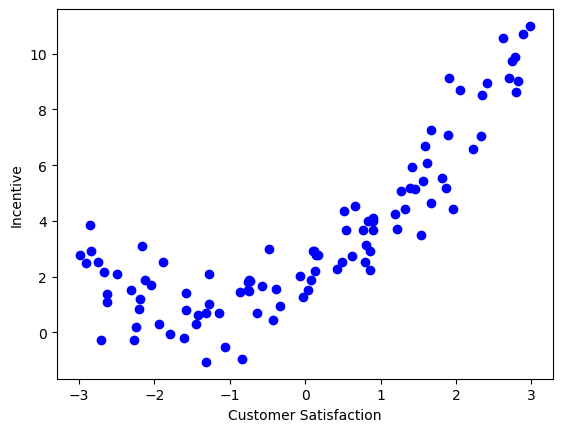

In [11]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

Burada g√∂rd√ºƒü√ºm√ºz √ºzere √∂nce azalan sonra artan polinomal bir ili≈üki var iki deƒüi≈üken arasƒ±nda.

Ama diyelim ki bunu anlayamadƒ±k ve bildiƒüimiz Lineer Regresyonu uygulamak istedik.

# Lineer Regresyon

In [18]:
# train - test split

In [12]:
X = df[["Customer Satisfaction"]]
y= df["Incentive"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [19]:
# standartization

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Model fitting

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Evalaute Model

In [28]:
y_pred = regression.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_pred)
print("Lineer Modelin r2 skoru : " , r2)

Lineer Modelin r2 skoru :  0.6638951059107576


Ba≈üarƒ±sƒ± 0.66'larda olan bir model ortaya √ßƒ±ktƒ±. Hoca da 0.27 √ßƒ±ktƒ± bende neden daha y√ºksek √ßƒ±ktƒ± √ß√∂zemedim demek ki hoca beceremedi :) 

A≈üaƒüƒ±ya grafiƒüini model fit eƒürisini √ßizdirerek g√∂relim.

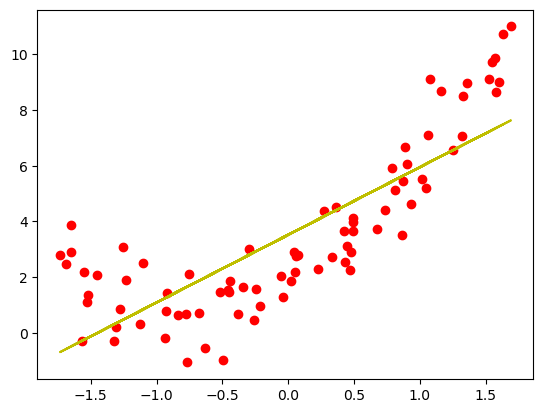

In [31]:
plt.scatter(X_train, y_train, color = "r")
plt.plot(X_train, regression.predict(X_train), color = "y")
plt.show()

Bu regresyonu polinom hale getirmeye ve r2 score'u arttƒ±rmaya √ßalƒ±≈üacaƒüƒ±z.

---
# Polinom Regresyon
≈ûimdi aslƒ±nda yapacaƒüƒ±mƒ±z i≈ülem elimizdeki data setini PolynomialFeatures k√ºt√ºphanesini kullanarak d√ºzenlemek olacak.

In [33]:
poly = PolynomialFeatures(degree = 2, include_bias=True)

In [35]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

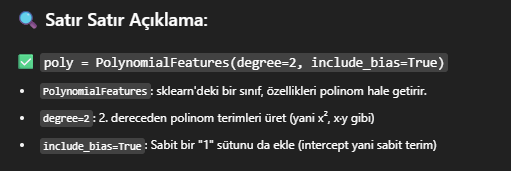

In [36]:
X_train_poly

array([[ 1.00000000e+00, -2.96075482e-01,  8.76606909e-02],
       [ 1.00000000e+00,  7.89404388e-01,  6.23159287e-01],
       [ 1.00000000e+00,  3.61259256e-01,  1.30508250e-01],
       [ 1.00000000e+00,  1.15801896e+00,  1.34100792e+00],
       [ 1.00000000e+00, -1.68859247e+00,  2.85134454e+00],
       [ 1.00000000e+00,  8.11246697e-01,  6.58121203e-01],
       [ 1.00000000e+00,  5.15027314e-02,  2.65253134e-03],
       [ 1.00000000e+00,  9.32604054e-01,  8.69750322e-01],
       [ 1.00000000e+00, -1.73364282e+00,  3.00551744e+00],
       [ 1.00000000e+00, -4.49688051e-01,  2.02219343e-01],
       [ 1.00000000e+00, -1.65264233e+00,  2.73122668e+00],
       [ 1.00000000e+00, -4.55225923e-01,  2.07230641e-01],
       [ 1.00000000e+00,  7.64322768e-02,  5.84189294e-03],
       [ 1.00000000e+00,  1.54756235e+00,  2.39494922e+00],
       [ 1.00000000e+00,  1.69171430e+00,  2.86189728e+00],
       [ 1.00000000e+00, -1.56893987e+00,  2.46157230e+00],
       [ 1.00000000e+00,  1.32502112e+00

X_train_poly, orijinal X_train verisinin geni≈ületilmi≈ü (zenginle≈ütirilmi≈ü) halidir.
Yani i√ßinde artƒ±k sadece x deƒüil, x¬≤, x¬∑y, 1 gibi ek polinom √∂zellikler de vardƒ±r.

Model artƒ±k sadece doƒürusal deƒüil, kƒ±vrƒ±mlƒ± / eƒüri bir ili≈üki de √∂ƒürenebilir.
√ñzellikle non-lineer (doƒürusal olmayan) veri ili≈ükileri varsa bu √ßok i≈üe yarar.



In [37]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_pred, y_test)
print("2 degree Polinom Regresyon r2 skoru : " , r2)

2 degree Polinom Regresyon r2 skoru :  0.8476661026058508


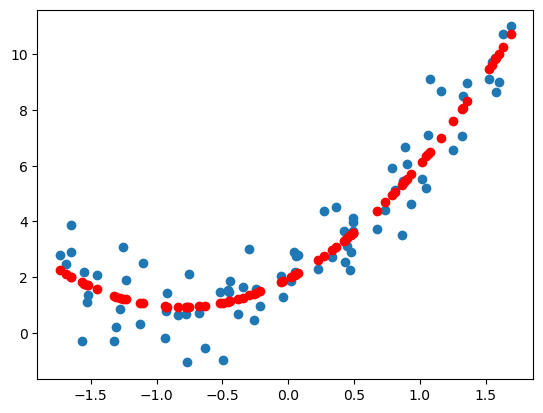

In [40]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

G√∂rd√ºƒü√ºm√ºz √ºzere daha d√ºzg√ºn bir ≈üekil ve daha doƒüru olan bir eƒürisel fit curve elde ettik.

≈ûimdi dereceyi 2 deƒüil de 3 yaparak elde edeceƒüimiz skorlarƒ± g√∂zlemleyelim.

In [43]:
poly = PolynomialFeatures(degree = 3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [44]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("3 degree Polinom Regresyon r2 skoru : " , r2)

3 degree Polinom Regresyon r2 skoru :  0.8784446149873106


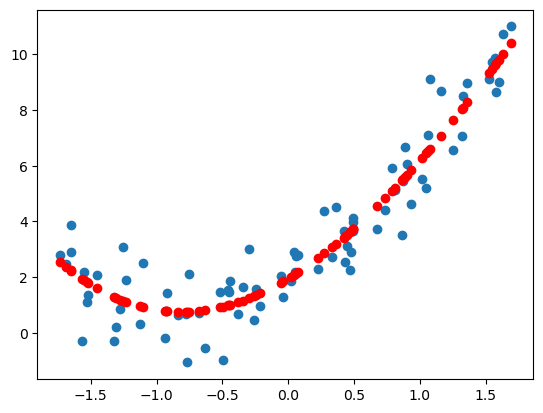

In [46]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

G√∂rd√ºƒü√ºm√ºz √ºzere r2 skoru daha da artƒ±≈ü g√∂sterdi. Dereceyi arttƒ±rarak bunu elde ettik. Belki de 4 yaparsam daha da y√ºksek bir skor elde ederim ?

---
Elimizdeki senaryo : Bu data setini kullanarak bir model eƒüittik ve ba≈üarƒ± yakaladƒ±k. ≈ûimdi yeni bir data seti gelecek benzer ≈üekilde i√ßerisinde sadece Customer Satisifaction olacak ve onlarƒ±n alacaklarƒ± primleri tahmin etmeye √ßalƒ±≈üacaƒüƒ±z.

In [53]:
df_new = pd.read_csv("9-newdatas.csv")

In [54]:
df_new.head()

0
0 -3.000000
1 -2.969849
2 -2.939698
3 -2.909548
4 -2.879397

In [55]:
df_new.rename(columns= {"0" : "Customer Satisfaction"} , inplace=True)   # Kolonun ismini d√ºzelttim.

In [56]:
df_new.head()

Customer Satisfaction
0              -3.000000
1              -2.969849
2              -2.939698
3              -2.909548
4              -2.879397

In [57]:
X_new = df_new[["Customer Satisfaction"]]
X_new

Customer Satisfaction
0                -3.000000
1                -2.969849
2                -2.939698
3                -2.909548
4                -2.879397
..                     ...
195               2.879397
196               2.909548
197               2.939698
198               2.969849
199               3.000000

[200 rows x 1 columns]

In [58]:
X_new = scaler.fit_transform(X_new)
# Yeni aldƒ±ƒüƒ±m data setini X_new deƒüi≈ükeni i√ßine attƒ±m ve bunu scale ettim. ≈ûimdi de poly'e √ßevirip  tahmin yapacaƒüƒ±m.

X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)

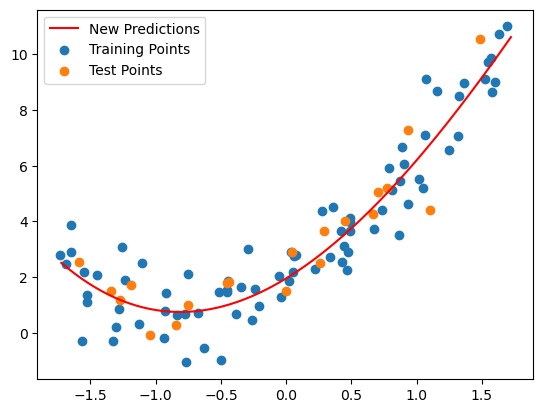

In [61]:
plt.plot(X_new, y_new, "r", label = "New Predictions")
plt.scatter(X_train, y_train, label = "Training Points")
plt.scatter(X_test, y_test, label = "Test Points")
plt.legend()
plt.show()

# PIPELINE

Pipeline, veri √ºzerinde adƒ±m adƒ±m uygulanacak i≈ülemleri tek bir yapƒ± i√ßinde sƒ±ralƒ± olarak tanƒ±mlar.

Yani:

‚úÖ √ñn i≈üleme

‚ûï √ñzellik d√∂n√º≈ü√ºm√º

‚ûï Model eƒüitimi

üîÅ Tahmin

Bunlarƒ±n hepsini birle≈ütirip otomatikle≈ütirir.

In [64]:
def poly_regression(degree):
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_features = PolynomialFeatures(degree = degree)

    pipeline = Pipeline(
        [
            ("standart_scaler", scaler),
            ("poly_features", poly_features),
            ("lin_reg", lin_reg)
        ]
    )

    pipeline.fit(X_train, y_train)    # T√ºm pipeline adƒ±mlarƒ± sƒ±rayla X_train'e uygulanƒ±yor.
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label = "New Predictions")
    plt.scatter(X_train, y_train, label = "Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()


R2 score:  0.6638951059107577


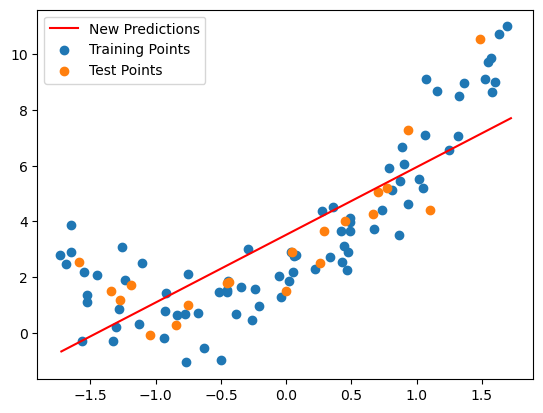

R2 score:  0.8774558449287947


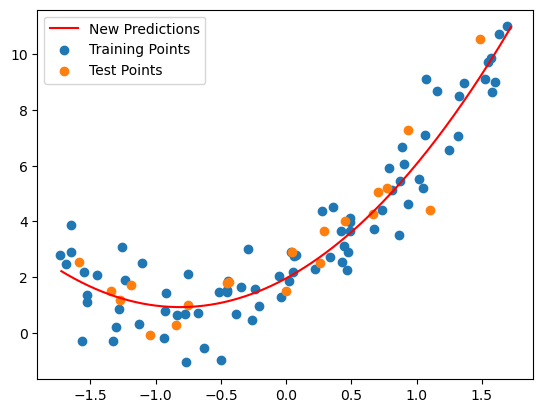

R2 score:  0.8784446149873105


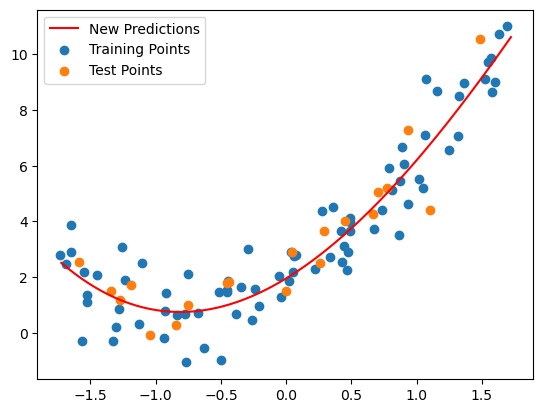

R2 score:  0.8820612203443438


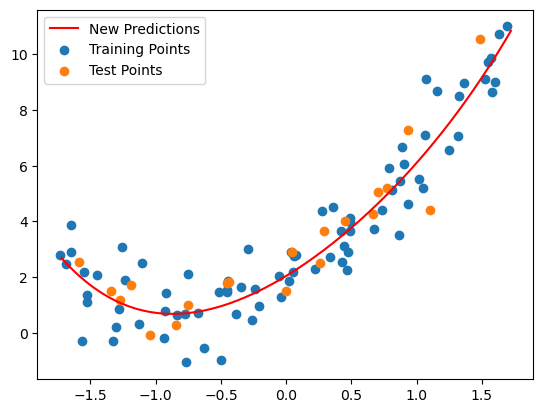

R2 score:  0.8808422084521534


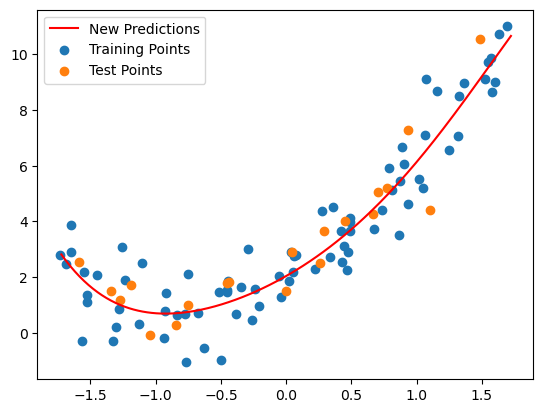

R2 score:  0.8806885482840653


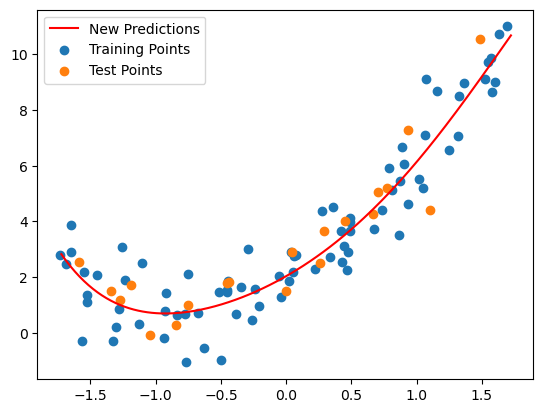

R2 score:  0.8810646178949544


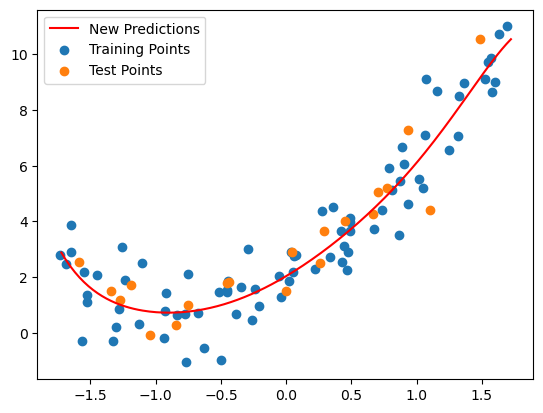

R2 score:  0.8561364653608862


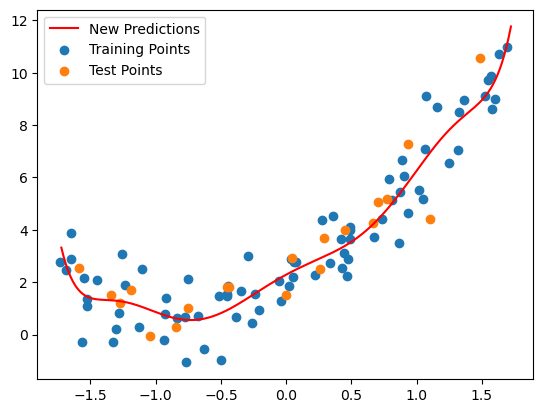

R2 score:  0.8505033739686889


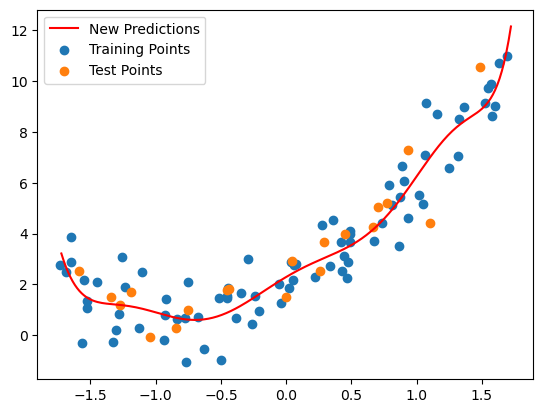

R2 score:  0.8439674671917892


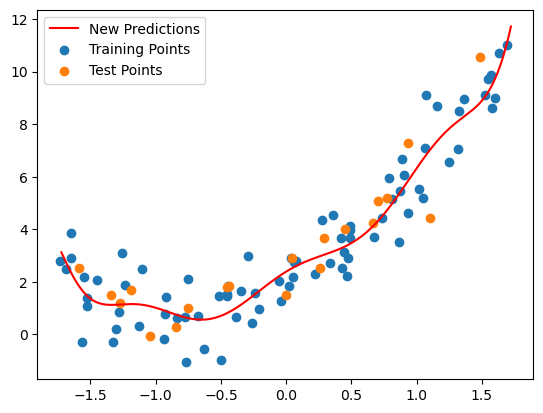

In [65]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)

Sonlara doƒüru overfitting yaptƒ±ƒüƒ±nƒ± fit line'ƒ±n sa√ßma sapan olan halinden anlayabiliyoruz.